In [36]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [37]:
# Read csv file
df = pd.read_csv("Cleaned_Dataset.csv")

In [38]:
df.head()

,Job Title,Job Info,Position,Employer,City,Province,Skill,Seniority,Work Type,Industry Type,Min_Salary,Max_Salary,Avg_Salary
0,Systems and Data Analysts,Binance Accelerator Program - Data Analyst (Risk),Risk Analyst,Binance,Remote,Undef,"Python, Sql",ANY,Remote,Others,76000.00,89440.0,82720.000
1,Business and Marketing Analysts,Business Analyst,Business Analyst,Canadian Nuclear Laboratories,Remote,Undef,"Power Bi, Power BI, Excel",ANY,Remote,Others,65000.00,87000.0,76000.000
2,Business and Technical Analysts,Geophysicist/Data Analyst,Data Analyst,Sander Geophysics Limited,Ottawa,ON,Undef,ANY,In-Person,Technology,64123.59,86600.0,75361.795
3,Systems and Data Analysts,Business Intelligence Data Engineer,Data Engineer,"Maximus Services, LLC",Toronto,ON,"Fabric, Power BI, Sql, Machine Learning, Genes...",ANY,In-Person,Service,87875.00,105000.0,96437.500
4,Systems and Data Analysts,"BUSINESS INTELLIGENCE SPECIALIST, FT",Data Specialist,Niagara Health System,Niagara,ON,"Azure, Power BI, SQL, Aws",Senior,In-Person,Healthcare,115211.20,130332.8,122772.000


In [39]:
df.duplicated().sum()

np.int64(143)

In [40]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1653 entries, 0 to 1795
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Job Title      1653 non-null   object 
 1   Job Info       1653 non-null   object 
 2   Position       1653 non-null   object 
 3   Employer       1653 non-null   object 
 4   City           1653 non-null   object 
 5   Province       1653 non-null   object 
 6   Skill          1653 non-null   object 
 7   Seniority      1653 non-null   object 
 8   Work Type      1653 non-null   object 
 9   Industry Type  1653 non-null   object 
 10  Min_Salary     1653 non-null   float64
 11  Max_Salary     1653 non-null   float64
 12  Avg_Salary     1653 non-null   float64
dtypes: float64(3), object(10)
memory usage: 180.8+ KB


### Descriptive Statistics

In [42]:
# Total number of job listings
print(f"Number of job listings: {df.shape[0]}")

Number of job listings: 1653


In [43]:
# Summarize categorical variables
category_columns = df.select_dtypes('object').columns
print('Categorical summary\n')
for category in category_columns:
    print(df[category].value_counts())
    print()


Categorical summary

Job Title
Senior Supply Chain Data Analysts        245
Senior Business Intelligence Analysts    216
Senior Business Analysts                 192
Business Systems Analysts                182
Systems and Data Analysts                169
Senior Data Analysts                     158
Business and Technical Analysts          146
Business and Marketing Analysts          141
Financial and Operational Analysts       139
Database Analysts                         65
Name: count, dtype: int64

Job Info
Business Analyst                                76
database analyst                                48
Data Analyst                                    32
business systems analyst                        29
data analyst - informatics and systems          25
                                                ..
Salesforce Technical Business Analyst            1
Business Systems Analyst (Digital Investing)     1
Application Support Analyst                      1
Forecast Business Analys

### Location Analysis

In [44]:
# Calculate Average Salary and Job Count by Provinces
province_job_count = df['Province'].value_counts().reset_index()
province_avg_salary = df.groupby(by='Province').agg({'Avg_Salary': 'mean'}).reset_index()

In [45]:
# Merge two df on province and rename columns
province_job_avg_salary = province_job_count.merge(province_avg_salary, on='Province').sort_values(by='Avg_Salary', ascending=False)
province_job_avg_salary.columns = ['Province', 'Number of Jobs', 'Avg_Salary']

In [46]:
province_job_avg_salary

,Province,Number of Jobs,Avg_Salary
8,SK,16,86221.362500
9,NL,5,85902.060000
1,BC,220,82357.979000
4,Undef,96,81442.459792
2,AB,174,80594.814770
0,ON,878,78620.094453
10,YT,2,78084.200000
12,NT,1,77750.000000
3,QC,168,76961.517560
7,NB,21,74404.214524


In [47]:
# Calculate weighted average of average salary
def w_avg(province_job_avg_salary, values, weights):
    d = province_job_avg_salary[values]
    w = province_job_avg_salary[weights]
    return (d * w).sum() / w.sum()

In [48]:
w_avg(province_job_avg_salary, 'Avg_Salary', 'Number of Jobs')

np.float64(78945.82207501512)

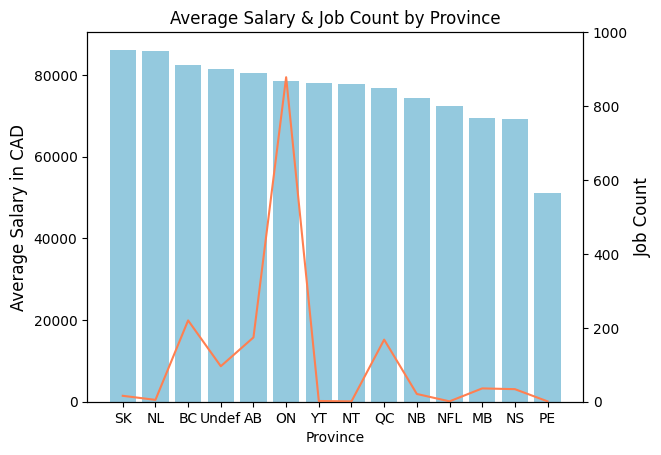

In [49]:
fig, ax1 = plt.subplots()

# Create bar plot for average salary
sns.barplot(data=province_job_avg_salary, x='Province', y='Avg_Salary', ax = ax1, color='skyblue')
ax1.set_ylabel('Average Salary in CAD', fontsize=12)

# Create secondary y-axis
ax2 = ax1.twinx()

# Ceate a lineplot for job count
sns.lineplot(data=province_job_count, x='Province', y='count', ax=ax2, color='coral', markers='o')
ax2.set_ylabel('Job Count', fontsize=12)

# Customize the plot
ax2.set_ylim(0, 1000)
plt.title('Average Salary & Job Count by Province')
plt.xticks(rotation=30)
plt.xlabel('Province')
plt.show()

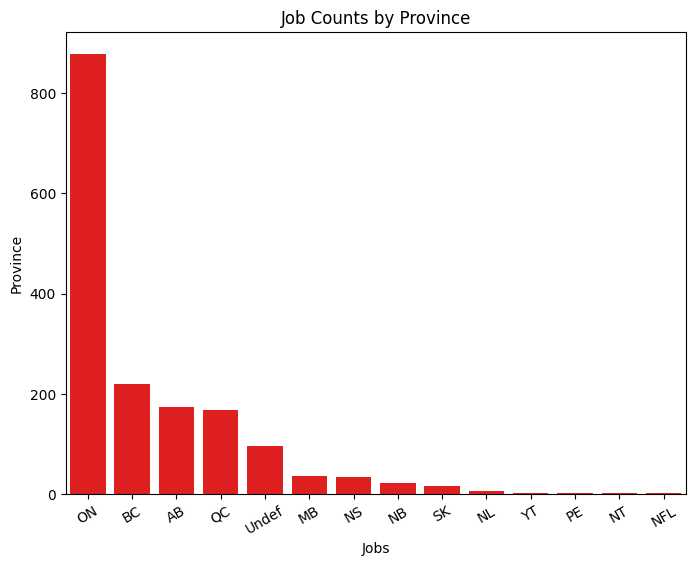

In [50]:
plt.figure(figsize=(8, 6))
sns.barplot(data=province_job_count, x='Province', y='count', legend=False, color='red')
plt.title('Job Counts by Province')
plt.ylabel('Province')
plt.xlabel('Jobs')
plt.xticks(rotation=30)
plt.show()

### Job Title

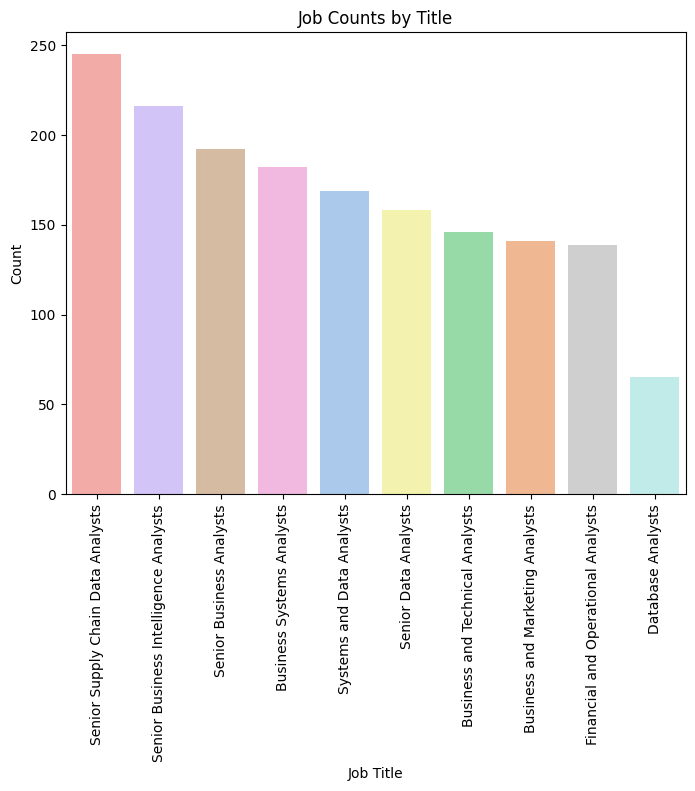

In [51]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Job Title', hue='Job Title', legend=False, palette='pastel', order=df['Job Title'].value_counts().index)
plt.title('Job Counts by Title')
plt.ylabel('Count')
plt.xlabel('Job Title')
plt.xticks(rotation=90)
plt.show()

### Work Type Analysis

In [52]:
work_type_jobs = df['Work Type'].value_counts().to_frame()

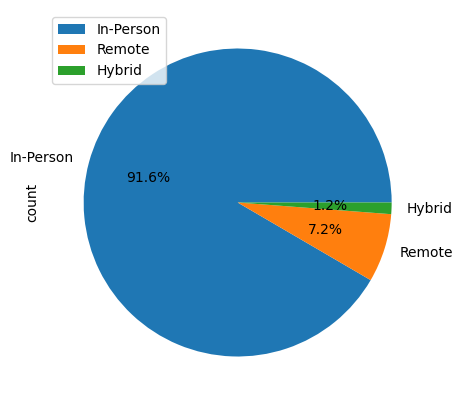

In [53]:
plot = work_type_jobs.plot.pie(y='count', figsize=(5,5), autopct='%1.1f%%')

### Industry Analysis

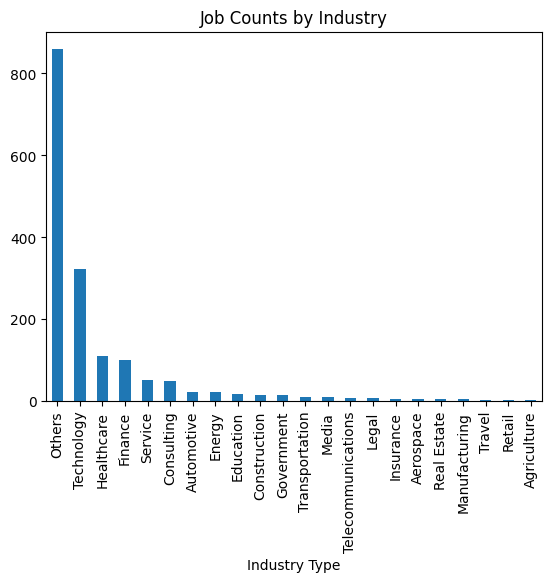

In [54]:
# By industry type
df['Industry Type'].value_counts().plot(kind='bar', title='Job Counts by Industry')
plt.show()

### Seniority Analysis

<Axes: title={'center': 'Data Analysis Job by Seniority'}, ylabel='count'>

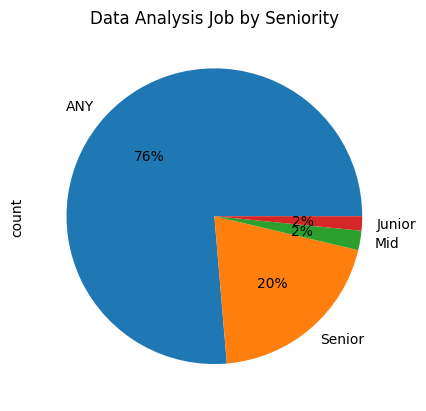

In [55]:
df['Seniority'].value_counts().plot(kind='pie', autopct='%1.0f%%', title='Data Analysis Job by Seniority')

### Salary Analysis

Text(0.5, 1.0, 'Salary Distribution for Data Analyst Roles')

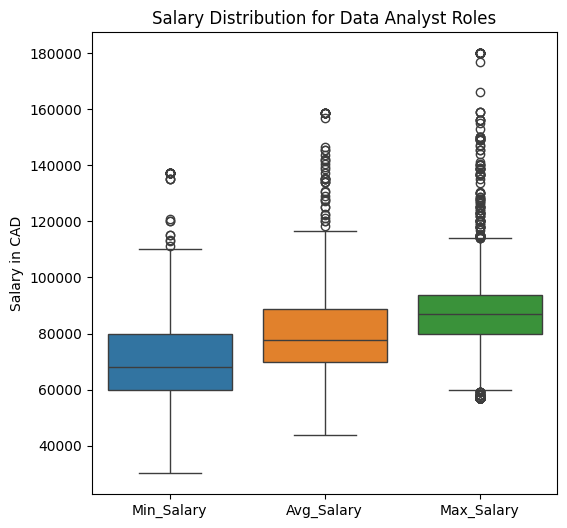

In [56]:
# Salary distribution
plt.figure(figsize=(6,6))
sns.boxplot(data=df[['Min_Salary', 'Avg_Salary',  'Max_Salary']], orient='v')
plt.ylabel('Salary in CAD')
plt.title('Salary Distribution for Data Analyst Roles')

Text(0, 0.5, 'Salary in CAD')

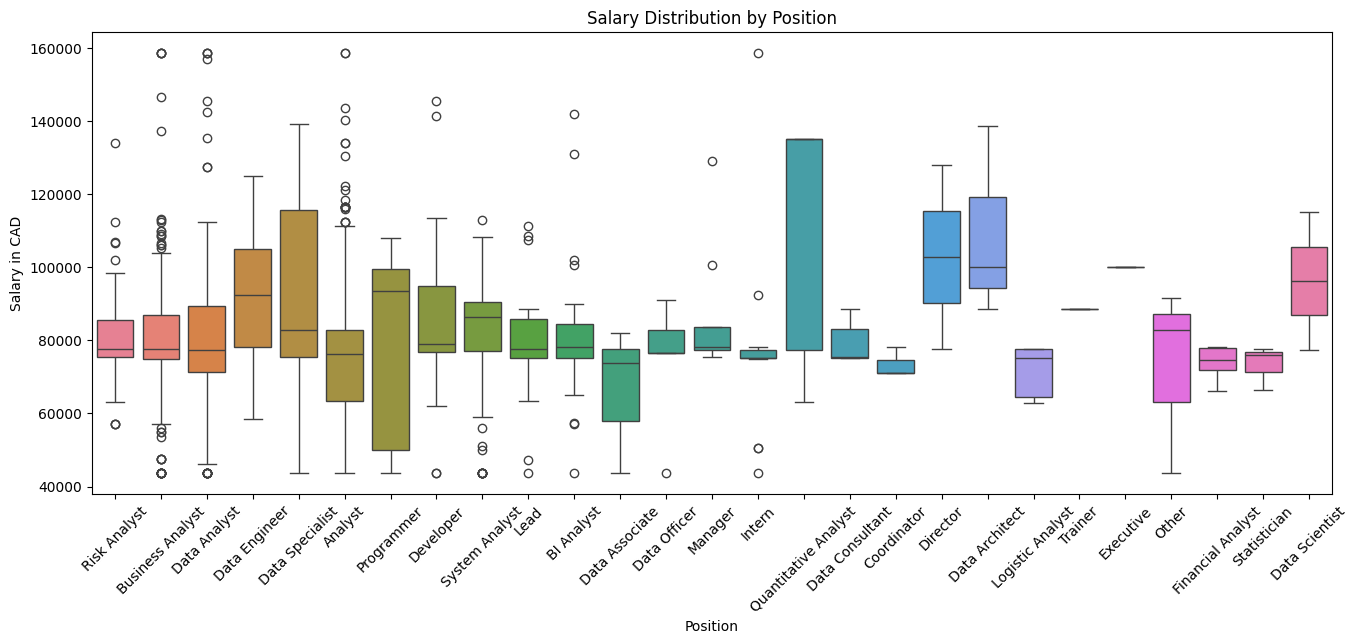

In [57]:
# Salary distribution by specific position
plt.figure(figsize=(16,6))
sns.boxplot(data=df, x='Position', y='Avg_Salary', hue='Position', legend=False, palette='husl')
plt.xticks(rotation=45)
plt.title('Salary Distribution by Position')
plt.ylabel('Salary in CAD')

Text(0, 0.5, 'Salary in CAD')

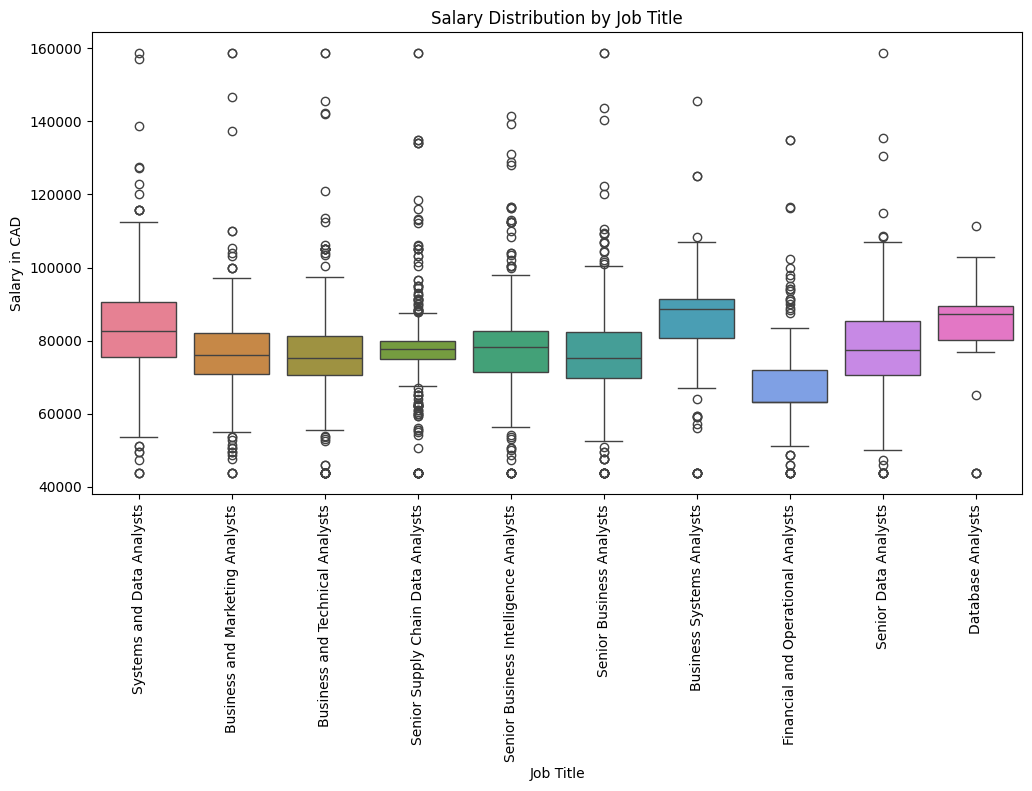

In [58]:
# Salary distribution by job title
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Job Title', y='Avg_Salary', hue='Job Title', legend=False, palette='husl')
plt.xticks(rotation=90)
plt.title('Salary Distribution by Job Title')
plt.ylabel('Salary in CAD')

Text(0, 0.5, 'Salary in CAD')

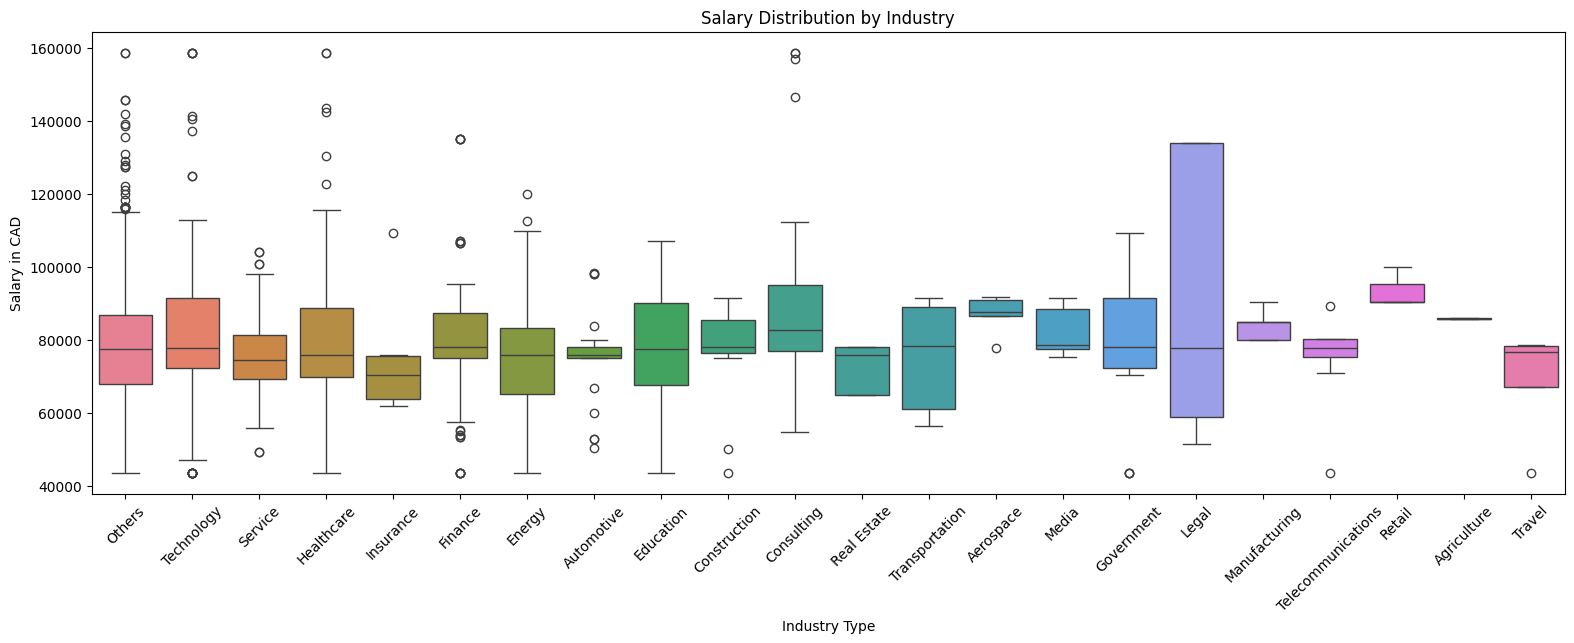

In [59]:
# Salary distribution by job industry
plt.figure(figsize=(19,6))
sns.boxplot(data=df, x='Industry Type', y='Avg_Salary', hue='Industry Type', legend=False, palette='husl')
plt.xticks(rotation=45)
plt.title('Salary Distribution by Industry')
plt.ylabel('Salary in CAD')

Text(0.5, 0, 'Arrangement')

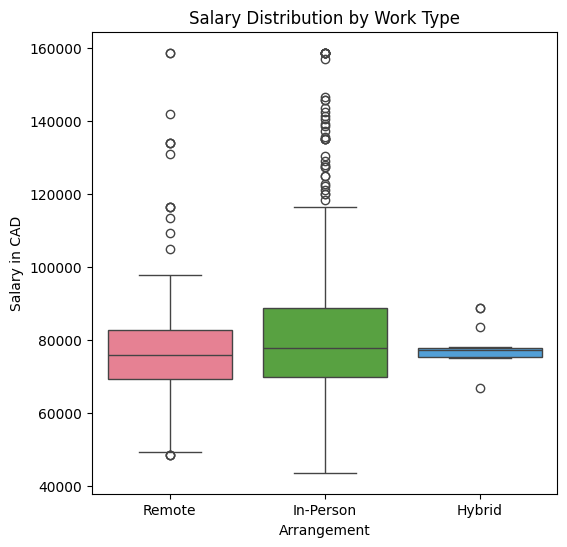

In [60]:
# Salary distribution by work type
plt.figure(figsize=(6,6))
sns.boxplot(data=df, x='Work Type', y='Avg_Salary', hue='Work Type', legend=False, palette='husl')
plt.title('Salary Distribution by Work Type')
plt.ylabel('Salary in CAD')
plt.xlabel('Arrangement')

Text(0, 0.5, 'Salary in CAD')

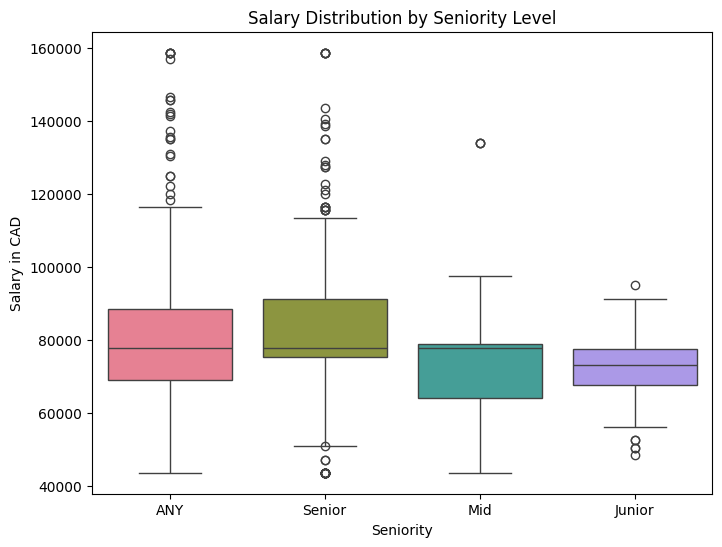

In [61]:
# Salary distribution by seniority level
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Seniority', y='Avg_Salary', hue='Seniority', legend=False, palette='husl')
plt.title('Salary Distribution by Seniority Level')
plt.ylabel('Salary in CAD')

### Skill Analysis

In [62]:
df['Skills_List'] = df['Skill'].str.split(', ')

In [63]:
skills = list()
for sub_list in df['Skills_List']:
    for skill in sub_list:
        skills.append(skill)

In [64]:
# Convert list to pandas Series
list_series = pd.Series(skills).str.title()

In [65]:
skill_df = list_series.value_counts(ascending=False).reset_index()
skill_df.columns = ['Skill', 'Frequency']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sql'),
  Text(1, 0, 'Python'),
  Text(2, 0, 'Power Bi'),
  Text(3, 0, 'Excel'),
  Text(4, 0, 'Tableau'),
  Text(5, 0, 'Statistics'),
  Text(6, 0, 'Database'),
  Text(7, 0, 'No Sql'),
  Text(8, 0, 'Undef'),
  Text(9, 0, 'R')])

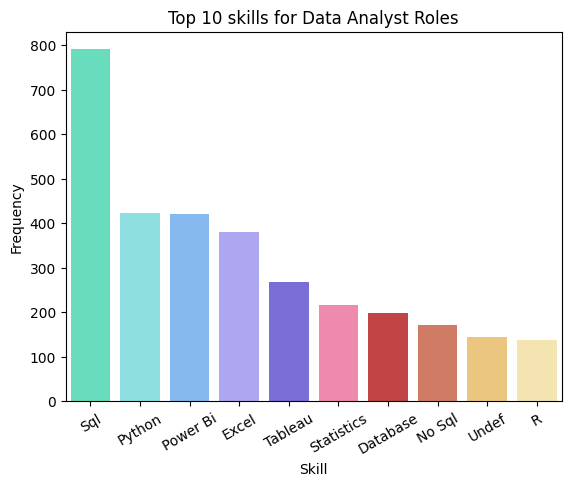

In [66]:
p = ['#55efc4', '#81ecec', '#74b9ff', '#a29bfe', '#6c5ce7', '#fd79a8', '#d63031', '#e17055', '#fdcb6e', '#ffeaa7']
sns.barplot(data=skill_df.head(10), x='Skill', y='Frequency', hue='Skill', legend=False, palette=p)
plt.title('Top 10 skills for Data Analyst Roles')
plt.xticks(rotation=30, horizontalalignment='center')

In [67]:
# Analysis of specific skill and average salary
desirable_skills = ['Python', 'SQL', 'Power BI', 'Excel']
for skill in desirable_skills:
    df['Has_Python'] = df['Skill'].apply(lambda x: 1 if ('Python' in x) else 0)
    df['Has_SQL'] = df['Skill'].apply(lambda x: 1 if (('SQL' in x) or ('Sql' in x)) else 0) 
    df['Has_PowerBI'] = df['Skill'].apply(lambda x: 1 if (('Power BI' in x) or ('Power Bi' in x)) else 0) 
    df['Has_Excel'] = df['Skill'].apply(lambda x: 1 if ('Excel' in x) else 0)

In [68]:
df.head(5)

,Job Title,Job Info,Position,Employer,City,Province,Skill,Seniority,Work Type,Industry Type,Min_Salary,Max_Salary,Avg_Salary,Skills_List,Has_Python,Has_SQL,Has_PowerBI,Has_Excel
0,Systems and Data Analysts,Binance Accelerator Program - Data Analyst (Risk),Risk Analyst,Binance,Remote,Undef,"Python, Sql",ANY,Remote,Others,76000.00,89440.0,82720.000,"[Python, Sql]",1,1,0,0
1,Business and Marketing Analysts,Business Analyst,Business Analyst,Canadian Nuclear Laboratories,Remote,Undef,"Power Bi, Power BI, Excel",ANY,Remote,Others,65000.00,87000.0,76000.000,"[Power Bi, Power BI, Excel]",0,0,1,1
2,Business and Technical Analysts,Geophysicist/Data Analyst,Data Analyst,Sander Geophysics Limited,Ottawa,ON,Undef,ANY,In-Person,Technology,64123.59,86600.0,75361.795,[Undef],0,0,0,0
3,Systems and Data Analysts,Business Intelligence Data Engineer,Data Engineer,"Maximus Services, LLC",Toronto,ON,"Fabric, Power BI, Sql, Machine Learning, Genes...",ANY,In-Person,Service,87875.00,105000.0,96437.500,"[Fabric, Power BI, Sql, Machine Learning, Gene...",1,1,1,0
4,Systems and Data Analysts,"BUSINESS INTELLIGENCE SPECIALIST, FT",Data Specialist,Niagara Health System,Niagara,ON,"Azure, Power BI, SQL, Aws",Senior,In-Person,Healthcare,115211.20,130332.8,122772.000,"[Azure, Power BI, SQL, Aws]",0,1,1,0


In [69]:
python_avg_salary = df.groupby(by='Has_Python')['Avg_Salary'].mean().reset_index()
sql_avg_salary = df.groupby(by='Has_SQL')['Avg_Salary'].mean().reset_index()
powerBi_avg_salary = df.groupby(by='Has_PowerBI')['Avg_Salary'].mean().reset_index()
excel_avg_salary = df.groupby(by='Has_Excel')['Avg_Salary'].mean().reset_index()


<Axes: xlabel='Has_Excel', ylabel='Avg_Salary'>

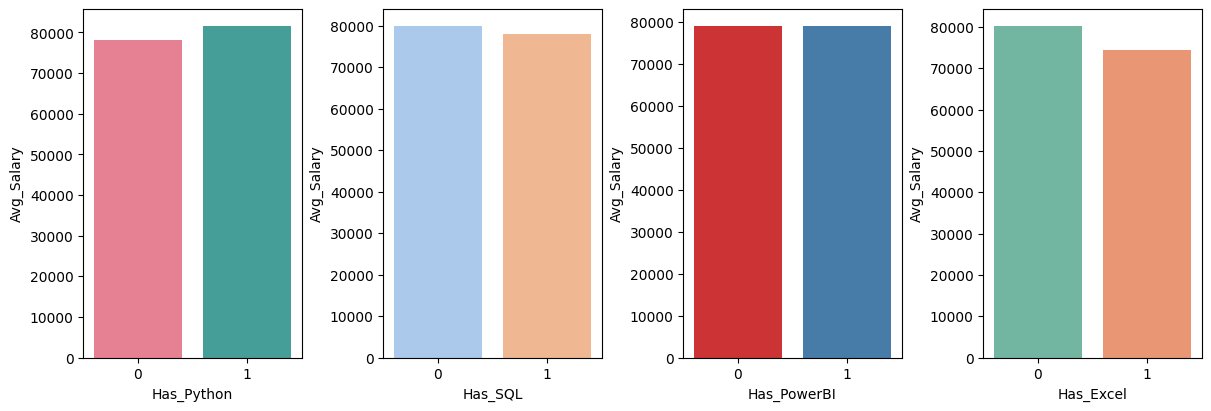

In [70]:
fig, axs = plt.subplots(1, 4, figsize=(12,4), layout='constrained')

sns.barplot(data=python_avg_salary, x='Has_Python', y='Avg_Salary', hue='Has_Python', legend=False, palette='husl', ax=axs[0])
sns.barplot(data=sql_avg_salary, x='Has_SQL', y='Avg_Salary', hue='Has_SQL', legend=False, palette='pastel', ax=axs[1])
sns.barplot(data=powerBi_avg_salary, x='Has_PowerBI', y='Avg_Salary', hue='Has_PowerBI', legend=False, palette='Set1', ax=axs[2])
sns.barplot(data=excel_avg_salary, x='Has_Excel', y='Avg_Salary', hue='Has_Excel', legend=False, palette='Set2', ax=axs[3])